# TP à rendre 4 descripteurs d'images
Dans ce TP, nous aimerions appliquer une analyse d'image en extrayant les points clés d'une image donnée.
L'objectif de la detection de points d'interet est d'initier des traitement ultérieurs tel que la comparaison d'images entres elles.

In [276]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from numpy import linalg as LA
import math

In [277]:
#lecture de l'image
image =cv.imread('image2.png',0)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: cHRM chunk does not match sRGB


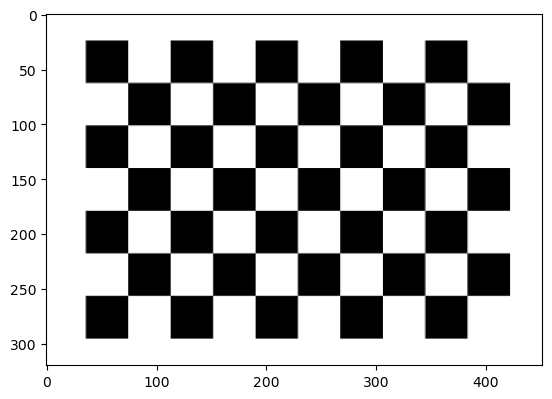

In [278]:
plt.imshow(image,cmap='gray')

# Detection de points avec le detecteur MORAVEC

Définition de paramètres

In [279]:
# paramétres de MORAVEC
S= 2  # Seuil
F= 3  # Taille de la fenêtre
U= [[1,0],[1,1],[0,1],[-1,1],[-1,0],[-1,-1],[0,-1],[1,-1]]# Déplacements

Calcul de la carte de coins (cornerness map)

In [280]:
imageHeight = image.shape[0]
imageWidth = image.shape[1]
cornernessMap = [] # Used to hold lists of variations after applying all the shifts to a given pixel.
# To construct the 3*3 window.
window = []
for i in range(0,F):
    row=[] # Used to hold the values of a row to construct the window.
    for j in range(0,F):
        row.append([i-1,j-1]) # Filling the row with the values.
    window.append(row) # Adding the row to the window (matrix).
window = np.array(window) # Converting the window list into a numpy array. 
#To construct the cornerness map using the algorithm given in the TD.
for x in range(2,imageHeight-2): # Row index.
    for y in range(2,imageWidth-2): # Column index.
        variations =[] # Used to hold the variations after applying all the shifts to the pixel (x,y).
        for shift in U: # To cycle through all the shifts and apply them to the pixel (x,y).
            uVariation = 0; u = shift[0]; v = shift[1] # To get the shifting values (u & v).
            # To cycle through the elements of the window and get the values a & b.
            for i in range(0,F):
                for j in range(0,F):
                    a = window[i,j,0]
                    b = window[i,j,1]
                    difference = image[x+u+a,y+v+b] - image[x+a,y+b] # Shifting differences.
                    uVariation = uVariation + difference**2 # The variation after the shift.
            variations.append(uVariation)
        cornernessMap.append(variations)
cornernessMap = np.array(cornernessMap)
print(cornernessMap)



/tmp/ipykernel_14637/115489644.py:23: RuntimeWarning: overflow encountered in ubyte_scalars
  difference = image[x+u+a,y+v+b] - image[x+a,y+b] # Shifting differences.


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Minimum de la carte de coins

In [281]:
minCornernessMap=[] # Used to hold the min variation among the resulted variations after applying all the shifts to a given pixel.
for i in range(0,cornernessMap.shape[0]):# To cycle the the cornernessMap array and get the min of each list of variations.
    minCornernessMap.append(np.min(cornernessMap[i])) # Getting the min of varitions of one pixel.
# print(minCornernessMap)
minCornernessMap=np.array(minCornernessMap)

Appel des fonctions pour calcul de points d'interêt

In [282]:
# To identify all the corners in the image.
imageMoravec = np.zeros((imageHeight,imageWidth),int)
k=0 # Used to correspond each min value in the CornernessMap to its pixel in the image.
for i in range(2,imageHeight-2):
    for j in range(2,imageWidth-2):
        if(minCornernessMap[k] >= S): imageMoravec[i,j] = 1 
        k+=1
# If you want to see the corners in white on a black background uncomment the line below.
# plt.imshow(imageMoravec,cmap='gray',vmin=0,vmax=1)

Affichage de l'image résultante, colorer chaque point d'interêt

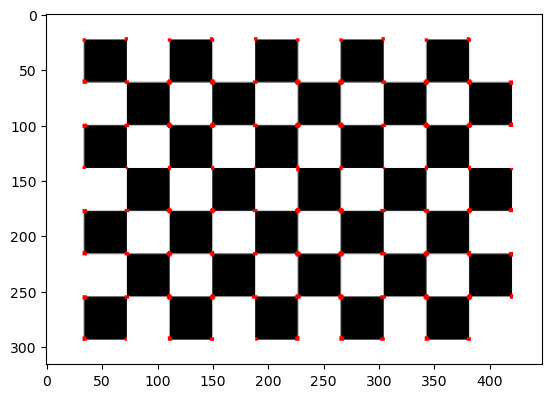

In [283]:
imageR = [] # To hold the colored image (well the image with the colored corners).
for i in range(2,imageHeight-2):
    row=[]
    for j in range(2,imageWidth-2):
        val = image[i,j]
        if(imageMoravec[i,j] == 1): row.append([255,0,0]) # If the pixel is a corner pixel then we set its color to red.
        else: row.append([val,val,val]) # If the pixel isn't a corner then just fill the three channels with the value of the pixel.
    imageR.append(row)
imageR = np.array(imageR)
plt.imshow(imageR)

# Descripteurs Harris
D'abord calculer les valeurs et vecteurs propres comme vu en TD, puis appliquer l'agorithme de Harris

In [284]:
A= [[-1,2,0],[0,3,4],[0,0,7]]
B=[[-1,2,2],[2,2,-1],[1,-2,1]]
val1, vec1 = LA.eig(A)
val2, vec2 = LA.eig(B)

In [285]:
print(val1,'\n', vec1,'\n',val2,'\n',vec2)

[-1.  3.  7.] 
 [[1.         0.4472136  0.17407766]
 [0.         0.89442719 0.69631062]
 [0.         0.         0.69631062]] 
 [-3.  2.  3.] 
 [[-8.16496581e-01  4.36435780e-01  7.02166694e-17]
 [ 4.08248290e-01 -2.18217890e-01 -7.07106781e-01]
 [ 4.08248290e-01  8.72871561e-01  7.07106781e-01]]


Expliquer le résultat obtenu, et comparer avec le TD;  
Pourquoi les résultats sont-ils différents?

# Reponse:
votre réponse ici ...

# Detection de points avec HARRIS
- appliquer les étapes vues en TD
- pour chaque point (x,y) de l'image, determiner si c'est un point d'interêt ou pas en prennant une fenêtre 3x3 entourant x,y

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]]


/tmp/ipykernel_14637/3305243608.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  xDerivative[i, j] = image[i+1, j]-image[i, j]


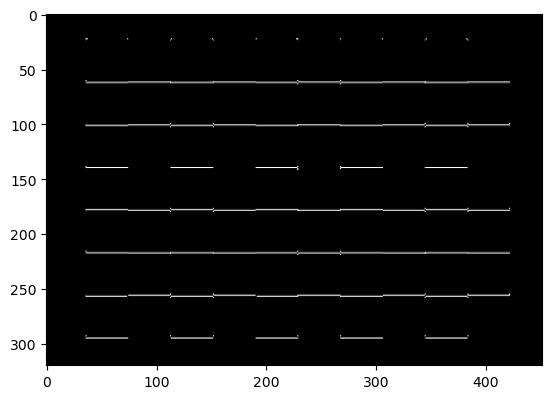

In [286]:
# Derivative of the image with respect to x.
xDerivative = np.zeros((imageHeight, imageWidth), int)
for i in range(0, imageHeight-1):
    for j in range(0, imageWidth):
        # G(x) = I(i+1,j) - I(i,j).
        xDerivative[i, j] = image[i+1, j]-image[i, j]
# The last row of the xDerivative will be the last row of the image times -1.
lastRow = imageHeight - 1
for i in range(0, imageWidth):
    xDerivative[lastRow, i] = -image[lastRow, i]
print(xDerivative)
plt.imshow(xDerivative,cmap='gray')

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


/tmp/ipykernel_14637/1608757174.py:6: RuntimeWarning: overflow encountered in ubyte_scalars
  yDerivative[i, j] = image[i, j+1]-image[i, j]


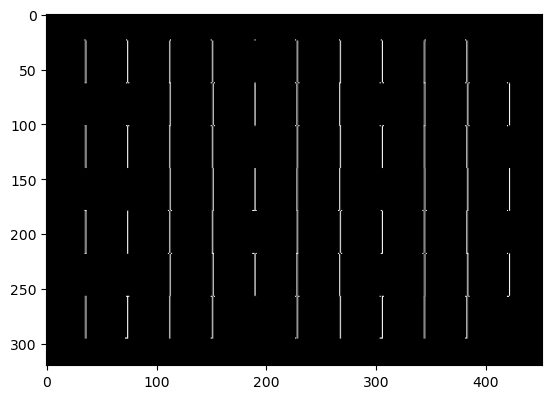

In [287]:
# Derivative of the image with respect to y.
yDerivative = np.zeros((imageHeight, imageWidth), int)
for j in range(0, imageWidth-1):
    for i in range(0, imageHeight):
        # G(y) = I(i,j+1) - I(i,j).
        yDerivative[i, j] = image[i, j+1]-image[i, j]
# The last column of the y Derivative will be the last Column of the image times -1.
lastColumn = imageWidth - 1
for i in range(0, imageHeight):
    yDerivative[i, lastColumn] = -image[i, lastColumn]
print(yDerivative)
plt.imshow(yDerivative,cmap='gray')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]]


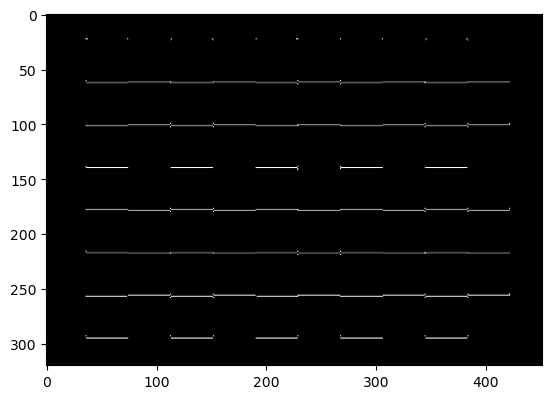

In [288]:
# The image (Ix)^2.
xDerivativePow2 = xDerivative * xDerivative
print(xDerivativePow2)
plt.imshow(xDerivativePow2,cmap='gray')

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


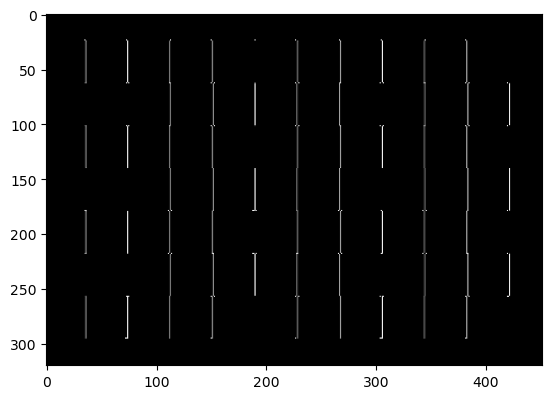

In [289]:
# The image (Iy)^2.
yDerivativePow2 = yDerivative * yDerivative
print(yDerivativePow2)
plt.imshow(yDerivativePow2,cmap='gray')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


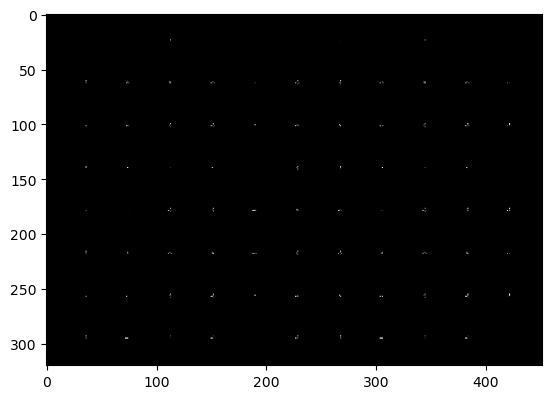

In [290]:
# The image (Ix Iy).
xyImg = xDerivative * yDerivative
print(xyImg)
plt.imshow(xyImg,cmap='gray')

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


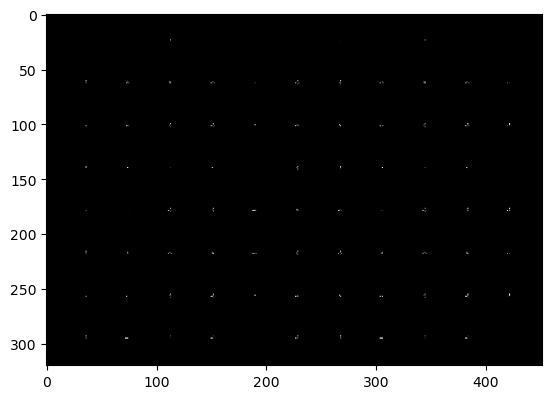

In [291]:
# The image (Iy Ix).
yxImg = yDerivative * xDerivative
print(yxImg)
plt.imshow(yxImg,cmap='gray')

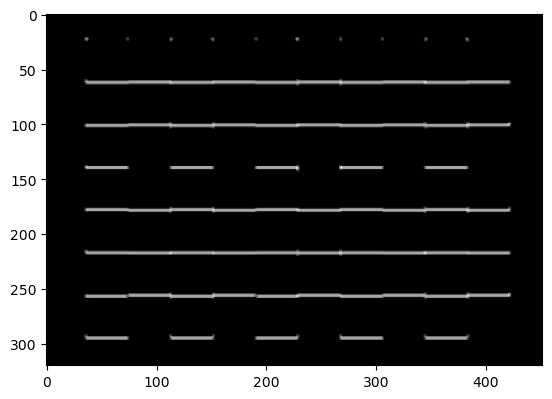

In [292]:
# Applying gauss filter to the derivative of the image with respect to x.
imgXDeriv = cv.GaussianBlur(np.uint8(xDerivative),ksize=(3,3),sigmaX=20, borderType=cv.BORDER_REFLECT)
plt.imshow(imgXDeriv,cmap='gray')

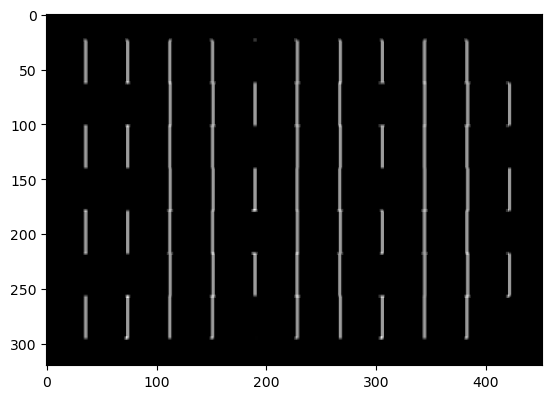

In [293]:
# Applying gauss filter to the derivative of the image with respect to y.
imgYDeriv = cv.GaussianBlur(np.uint8(yDerivative),ksize=(3,3),sigmaX=20, borderType=cv.BORDER_REFLECT)
plt.imshow(imgYDeriv,cmap='gray')

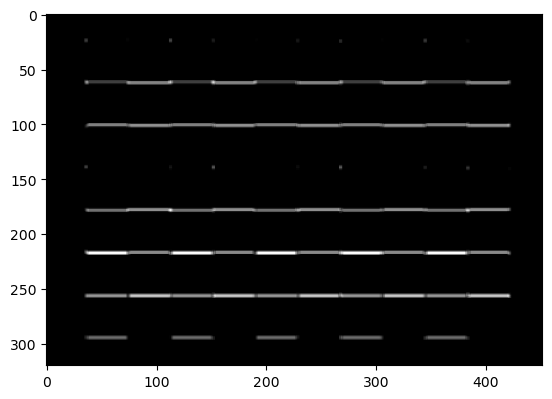

In [294]:
# Applying gauss filter to the image (Ix)^2.
imgPow2XDeriv = cv.GaussianBlur(np.uint8(xDerivativePow2),ksize=(3,3),sigmaX=20, borderType=cv.BORDER_REFLECT)
plt.imshow(imgPow2XDeriv,cmap='gray')

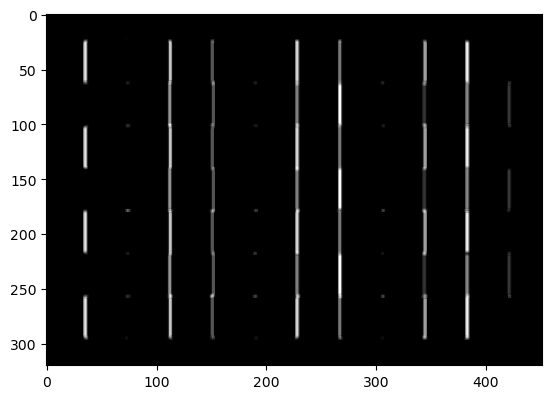

In [295]:
# Applying gauss filter to the image (Iy)^2.
imgPow2YDeriv = cv.GaussianBlur(np.uint8(yDerivativePow2),ksize=(3,3),sigmaX=20, borderType=cv.BORDER_REFLECT)
plt.imshow(imgPow2YDeriv,cmap='gray')

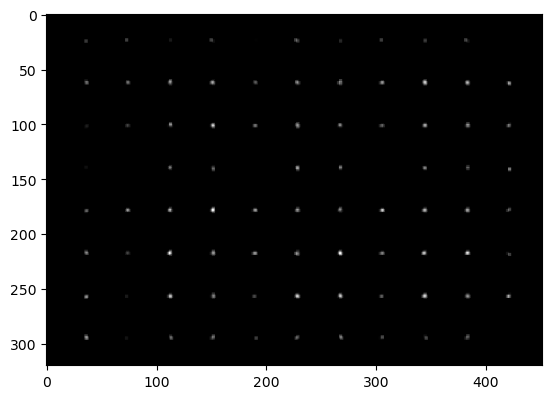

In [296]:
# Applying gauss filter to the image (Ix Iy).
imgXY= cv.GaussianBlur(np.uint8(xyImg),ksize=(3,3),sigmaX=20, borderType=cv.BORDER_REFLECT)
plt.imshow(imgXY,cmap='gray')

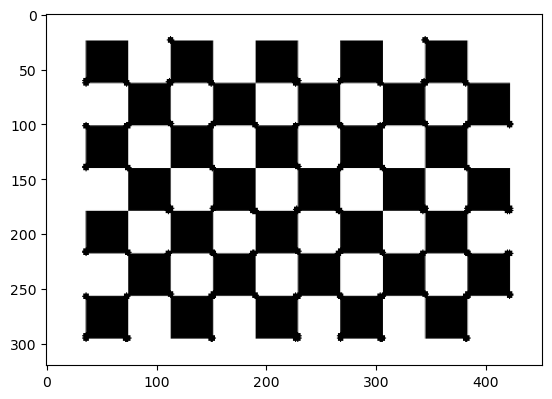

In [297]:
# Harris Function
harris = xDerivativePow2 * yDerivativePow2 - np.square(imgXY) - 0.12 * np.square(xDerivativePow2 + yDerivativePow2) # r(harris) = det - k*(trace**2)
# Normalizing inside (0-1)
cv.normalize(harris, harris, 0, 1, cv.NORM_MINMAX)
# find all points above threshold (nonmax supression line)
threshold = 0.25
loc = np.where(harris >= threshold)
# drawing filtered points
copy = image.copy()
for pt in zip(*loc[::-1]):
    cv.circle(copy, pt, 3, (0, 0, 255), -1)
plt.imshow(copy, cmap='gray')

comparer avec opencv

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


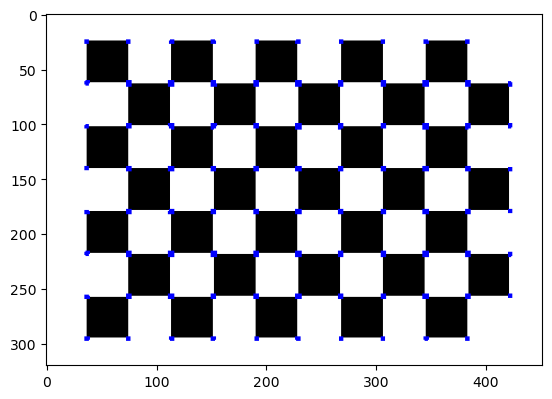

In [298]:
img=image.copy()
# Detecter les points avec Harris
dst = cv.cornerHarris(img,2,3,0.04)
# Dilater l'image pour mieux visualiser les points de coins
dst = cv.dilate(dst,None)
# Créer une image RVB
img2=np.zeros((img.shape[0],img.shape[1],3))
img2[:,:,0]=img
img2[:,:,1]=img
img2[:,:,2]=img
# Dessiner les points sur l'image RVB
img2[dst>0.01*dst.max()]=[0,0,255]
plt.imshow(img2)